<a href="https://colab.research.google.com/github/thisischewy/data_science_projects/blob/master/Movie_Ratings_Analytics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
import os

In [2]:
os.getcwd()

'/content'

In [0]:
movies = pd.read_csv('sample_data/P4-Movie-Ratings.csv')

In [25]:
len(movies)

559

In [26]:
movies.head()

,Film,Genre,Rotten Tomatoes Ratings %,Audience Ratings %,Budget (million $),Year of release
0,(500) Days of Summer,Comedy,87,81,8,2009
1,"10,000 B.C.",Adventure,9,44,105,2008
2,12 Rounds,Action,30,52,20,2009
3,127 Hours,Adventure,93,84,18,2010
4,17 Again,Comedy,55,70,20,2009


In [27]:
movies.columns

Index(['Film', 'Genre', 'Rotten Tomatoes Ratings %', 'Audience Ratings %',
       'Budget (million $)', 'Year of release'],
      dtype='object')

In [0]:
movies.columns = ['Film', 'Genre', 'CriticRating', 'AudienceRating', 'BudgetMillions', 'Year']

In [29]:
movies.head()

,Film,Genre,CriticRating,AudienceRating,BudgetMillions,Year
0,(500) Days of Summer,Comedy,87,81,8,2009
1,"10,000 B.C.",Adventure,9,44,105,2008
2,12 Rounds,Action,30,52,20,2009
3,127 Hours,Adventure,93,84,18,2010
4,17 Again,Comedy,55,70,20,2009


In [30]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 559 entries, 0 to 558
Data columns (total 6 columns):
Film              559 non-null object
Genre             559 non-null object
CriticRating      559 non-null int64
AudienceRating    559 non-null int64
BudgetMillions    559 non-null int64
Year              559 non-null int64
dtypes: int64(4), object(2)
memory usage: 26.3+ KB


In [0]:
movies.Film = movies.Film.astype('category')

In [32]:
movies.head()

,Film,Genre,CriticRating,AudienceRating,BudgetMillions,Year
0,(500) Days of Summer,Comedy,87,81,8,2009
1,"10,000 B.C.",Adventure,9,44,105,2008
2,12 Rounds,Action,30,52,20,2009
3,127 Hours,Adventure,93,84,18,2010
4,17 Again,Comedy,55,70,20,2009


In [33]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 559 entries, 0 to 558
Data columns (total 6 columns):
Film              559 non-null category
Genre             559 non-null object
CriticRating      559 non-null int64
AudienceRating    559 non-null int64
BudgetMillions    559 non-null int64
Year              559 non-null int64
dtypes: category(1), int64(4), object(1)
memory usage: 47.4+ KB


In [0]:
movies.Genre = movies.Genre.astype('category')
movies.Year = movies.Year.astype('category')

In [35]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 559 entries, 0 to 558
Data columns (total 6 columns):
Film              559 non-null category
Genre             559 non-null category
CriticRating      559 non-null int64
AudienceRating    559 non-null int64
BudgetMillions    559 non-null int64
Year              559 non-null category
dtypes: category(3), int64(3)
memory usage: 40.3 KB


In [36]:
movies.Genre.cat.categories

Index(['Action', 'Adventure', 'Comedy', 'Drama', 'Horror', 'Romance',
       'Thriller'],
      dtype='object')

In [0]:
from matplotlib import pyplot as plt
import seaborn as sns
plt.rcParams['figure.figsize']=10,5
%matplotlib inline

In [0]:
# Jointplots

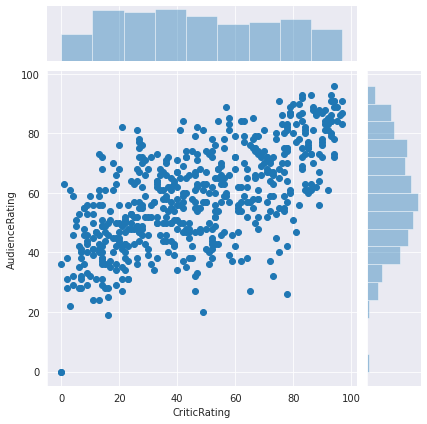

In [72]:
j = sns.jointplot(data=movies, x='CriticRating', y='AudienceRating')

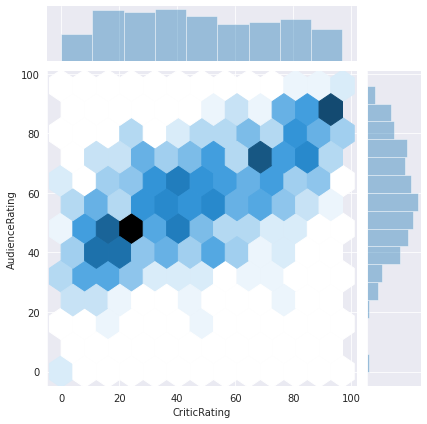

In [73]:
# change style of jointplot

j = sns.jointplot(data=movies, x='CriticRating', y='AudienceRating', kind='hex')

In [0]:
# histograms

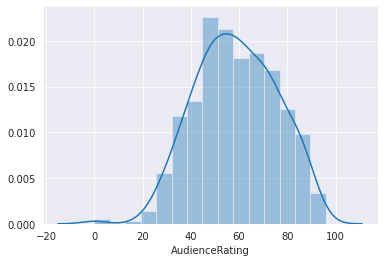

In [75]:
sns.set_style('darkgrid')
m1 = sns.distplot(movies.AudienceRating, bins=15)

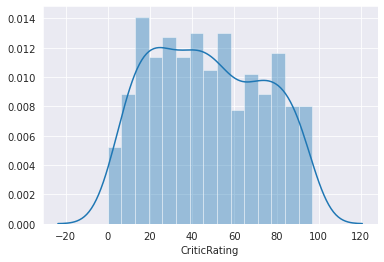

In [76]:
m1 = sns.distplot(movies.CriticRating, bins=15)

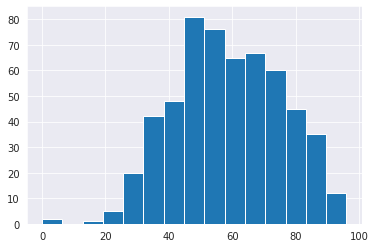

In [77]:
# plyplot version

n1 = plt.hist(movies.AudienceRating, bins=15)

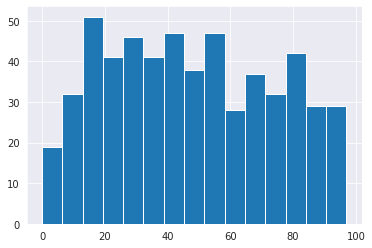

In [78]:
n1 = plt.hist(movies.CriticRating, bins=15)

In [0]:
# Stacked Histograms

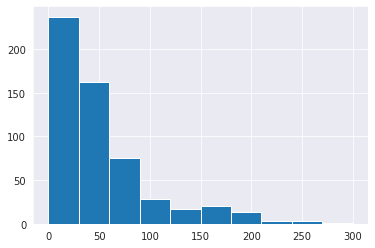

In [80]:
h1 = plt.hist(movies.BudgetMillions)

In [81]:
# budget of movie for a certain genre

movies[movies.Genre == 'Drama'].BudgetMillions

10     30
11     20
13      7
18      8
23     20
       ..
529    66
532    38
534    21
541    15
545     2
Name: BudgetMillions, Length: 101, dtype: int64

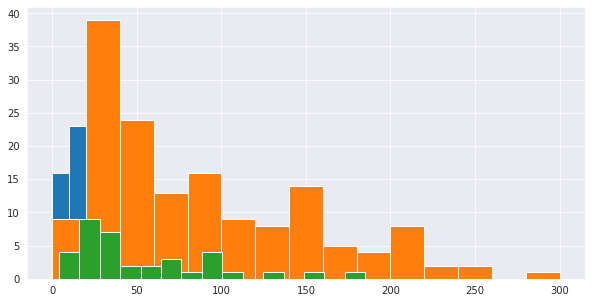

In [83]:
plt.rcParams['figure.figsize']=10,5
plt.hist(movies[movies.Genre == 'Drama'].BudgetMillions, bins=15)
plt.hist(movies[movies.Genre == 'Action'].BudgetMillions, bins=15)
plt.hist(movies[movies.Genre == 'Thriller'].BudgetMillions, bins=15)
plt.show()

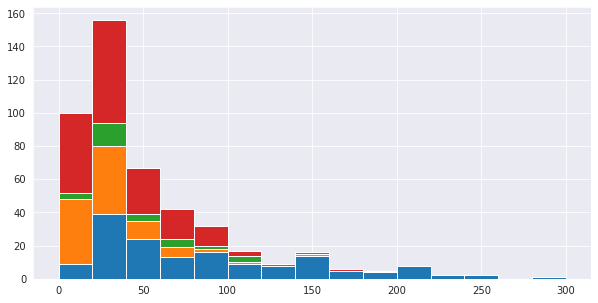

In [92]:
plt.hist([movies[movies.Genre == 'Action'].BudgetMillions, 
          movies[movies.Genre == 'Drama'].BudgetMillions,
          movies[movies.Genre == 'Thriller'].BudgetMillions,
          movies[movies.Genre == 'Comedy'].BudgetMillions], 
         bins=15, stacked=True)
plt.show()

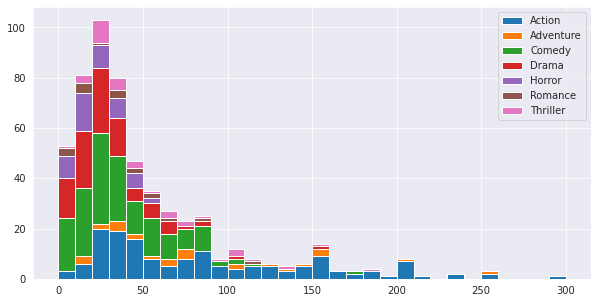

In [100]:
genres = movies.Genre.cat.categories
list1 = []
mylabels = []
for gen in genres:
  list1.append(movies[movies.Genre == gen].BudgetMillions)
  mylabels.append(gen)

h = plt.hist(list1, bins=30, stacked=True, label=mylabels)
plt.legend()
plt.show()

In [0]:
# KDE plot

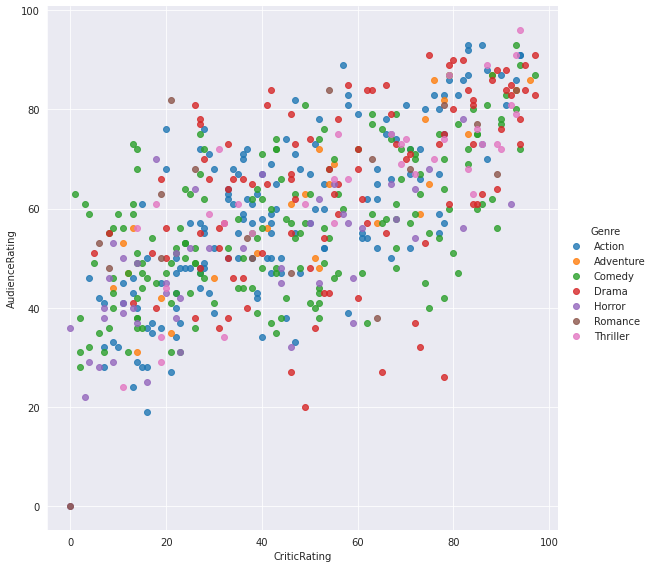

In [104]:
vis1 = sns.lmplot(data=movies, x='CriticRating', y='AudienceRating', fit_reg=False, hue='Genre', height=8, aspect=1)

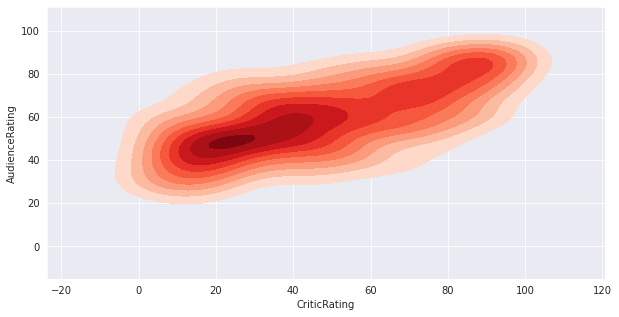

In [109]:
k1 = sns.kdeplot(movies.CriticRating, movies.AudienceRating, shade=True, shade_lowest=False, cmap='Reds')

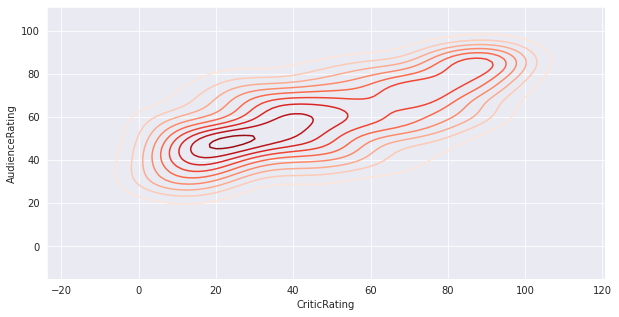

In [110]:
k1b = sns.kdeplot(movies.CriticRating, movies.AudienceRating, cmap='Reds')